# Financial Time Series Analysis
# 2 Exploratory analysis and volatility

In [61]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/financial_data.csv', index_col=0, parse_dates=True)
data.head()

,Close_BTC-USD,Close_EURUSD=X,Close_^GSPC,Volume_BTC-USD,Volume_^GSPC
Date,,,,,
2015-01-01,314.248993,1.209863,2058.199951,8036550,0.000000e+00
2015-01-02,315.032013,1.208941,2058.199951,7860650,2.708700e+09
2015-01-03,281.082001,1.208941,2058.199951,33054400,0.000000e+00
2015-01-04,264.195007,1.208941,2058.199951,55629100,0.000000e+00
2015-01-05,274.473999,1.194643,2020.579956,43962800,3.799120e+09


## 2.1. Initial Visualization

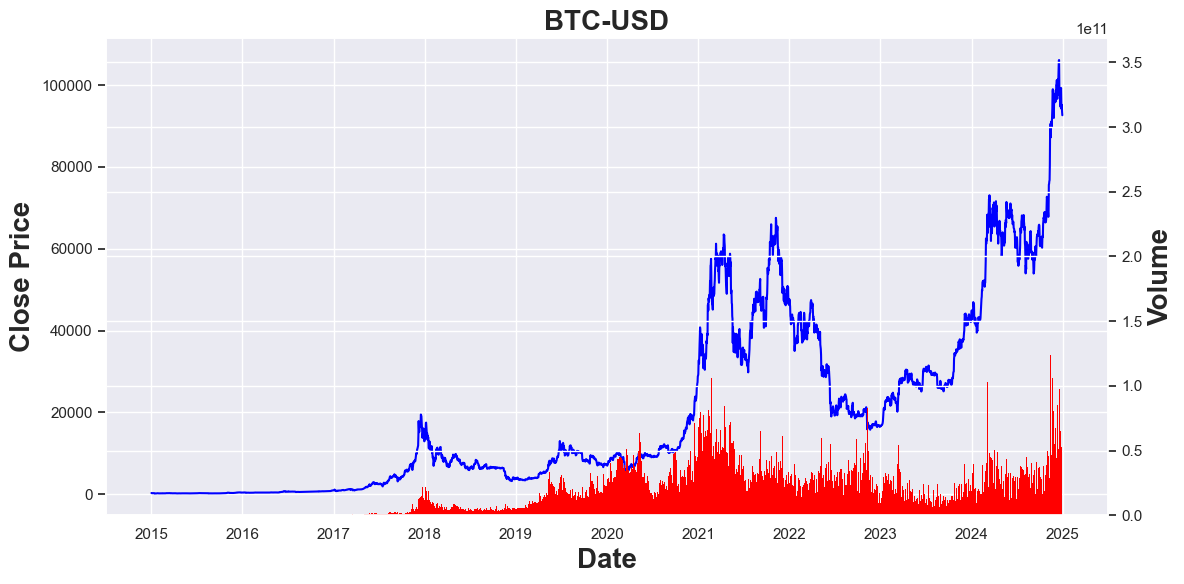

In [56]:
def Visual(data,  asset_name):
    sns.set(style="darkgrid")

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Price
    sns.lineplot(data=data, x=data.index,y=f"Close_{asset_name}", ax=ax1, color='blue')
    ax1.set_xlabel("Date", fontsize=20, fontweight='bold')
    ax1.set_ylabel("Close Price", fontsize=20, fontweight='bold')
    ax1.tick_params(axis='y')

    # Volume
    volume_col = f"Volume_{asset_name}"
    if volume_col in data.columns:
        ax2 = ax1.twinx()
        ax2.bar( data.index, data[volume_col], color='red', edgecolor='black', linewidth=0, width=1   )

        ax2.set_ylabel("Volume", fontsize=20, fontweight='bold')
        ax2.tick_params(axis='y')


    plt.title(asset_name, fontsize=20, fontweight='bold')
    plt.tight_layout()

    plt.show()

Visual(data,  "BTC-USD")

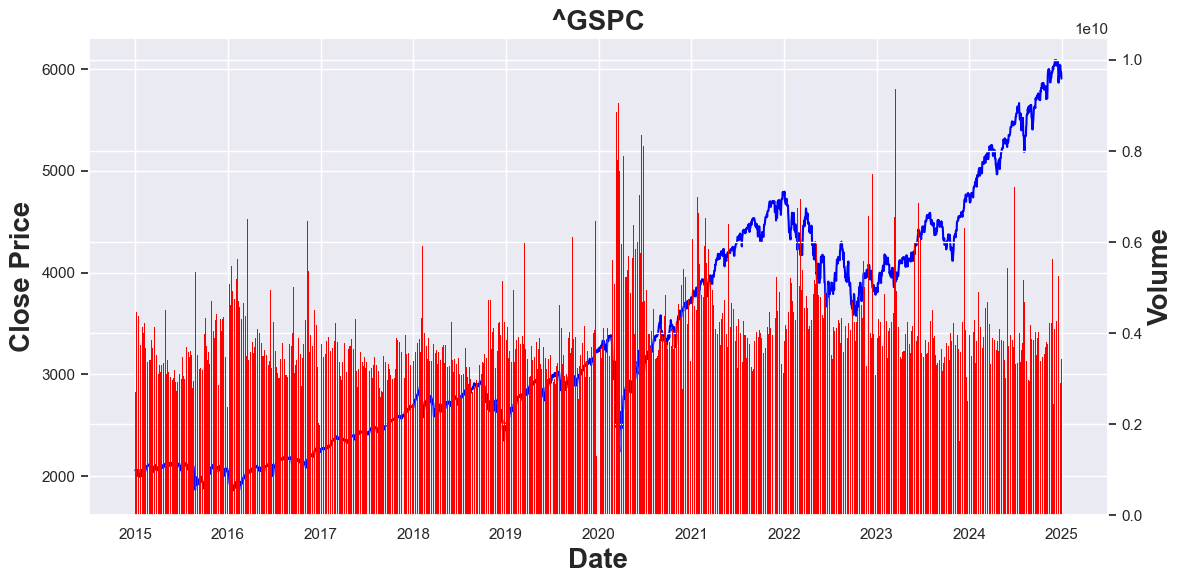

In [57]:
Visual(data,  "^GSPC")

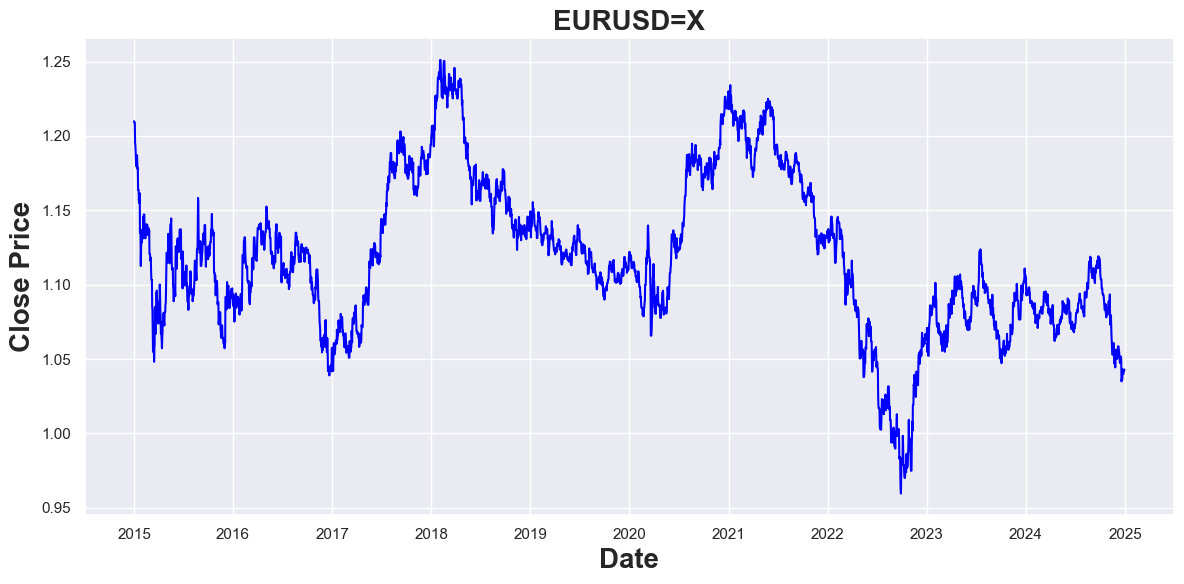

In [58]:
Visual(data,  "EURUSD=X")

## 2.2. Returns

In [30]:
close_cols = [col for col in data.columns if col.startswith("Close_")]
returns = np.log(data[close_cols] / data[close_cols].shift(1))
returns = returns.dropna()
returns.to_csv('../data/log_returns.csv')
returns.describe()

,Close_BTC-USD,Close_EURUSD=X,Close_^GSPC
count,3651.000000,3651.000000,3651.000000
mean,0.001557,-0.000041,0.000289
std,0.036544,0.004201,0.009355
min,-0.464730,-0.028144,-0.127652
25%,-0.012222,-0.001614,-0.001481
50%,0.001390,0.000000,0.000000
75%,0.016812,0.001401,0.002926
max,0.225119,0.028145,0.089683


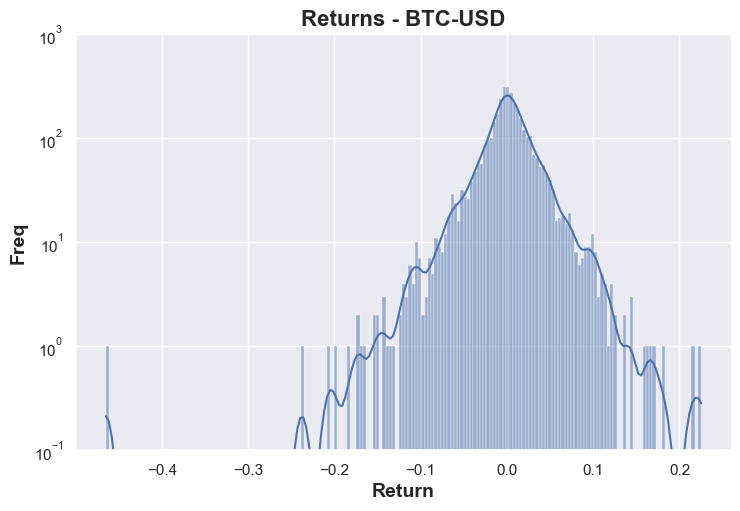

In [97]:
def ReturnDistVisual(data, asset):
    column_name = f"Close_{asset}"
    mask = ~((returns[column_name] == 0))
    returns_filtered = returns[mask]
    g = sns.displot(data=returns_filtered, x=column_name, kde=True, height=5, aspect=1.5)

    g.ax.set_yscale("log")
    g.ax.set_xlabel("Return", fontsize=14, fontweight='bold')
    
    g.ax.set_ylabel("Freq", fontsize=14, fontweight='bold')
    g.ax.set_ylim(0.1, 1000)
    plt.title(f"Returns - {asset}",  fontsize=16, fontweight='bold')
    plt.show()

ReturnDistVisual(returns, "BTC-USD")

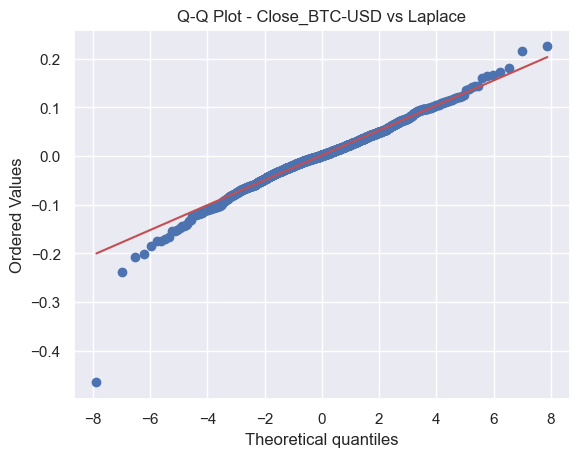

In [67]:
def qq_plot(data, column_name,  dist='norm'):
    if column_name not in data.columns:
        raise ValueError(f"La columna '{column_name}' no existe en el DataFrame.")
    mask = ~((returns[column_name] == 0))
    data_filtered = 
    stats.probplot(data_filtered[column_name].dropna(), dist=dist, plot=plt)
    plt.title(f"Q-Q Plot - {column_name} vs {dist.capitalize()}")
    plt.grid(True)
    plt.show()
    
qq_plot(returns, "Close_BTC-USD",dist='laplace')

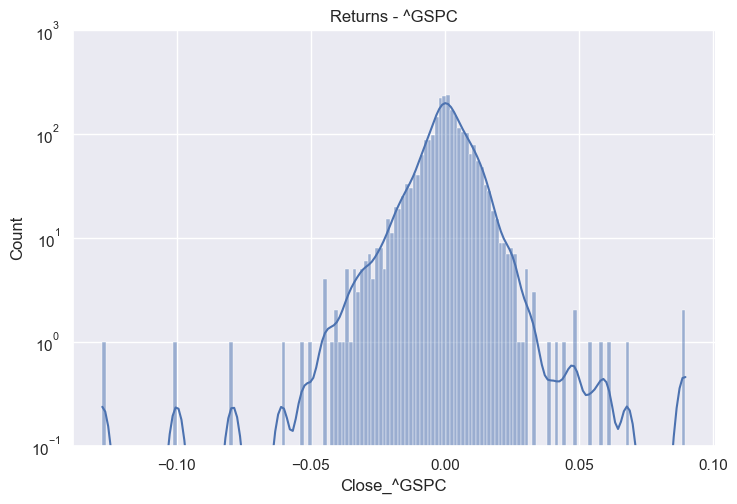

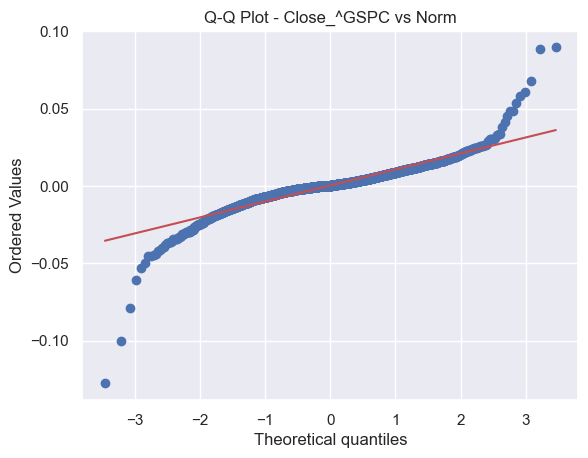

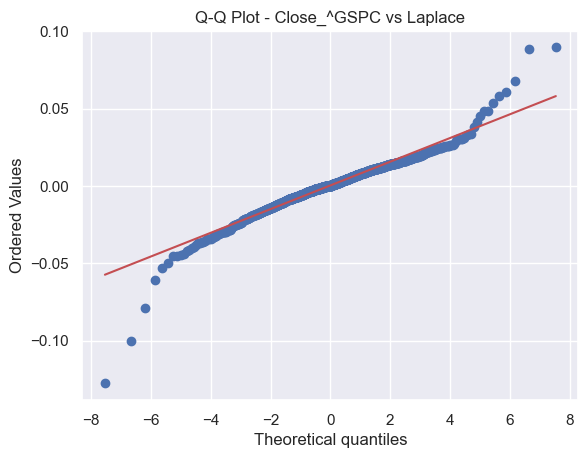

In [92]:
ReturnDistVisual(returns, "^GSPC")
qq_plot(returns_filtered, "Close_^GSPC")
qq_plot(returns_filtered, "Close_^GSPC", "laplace")

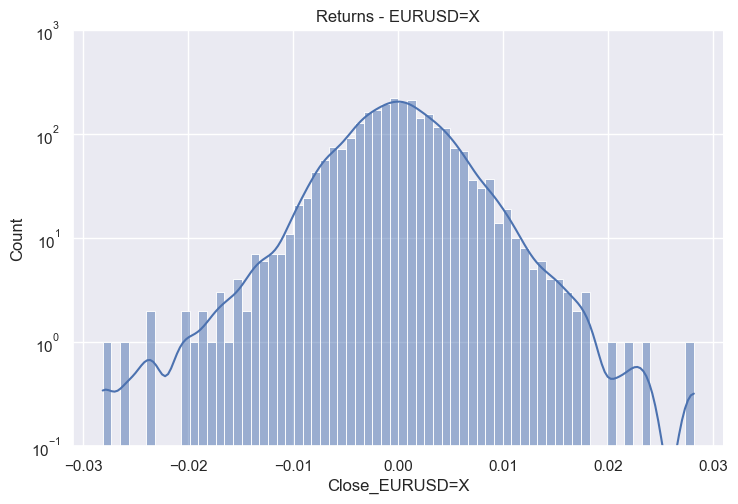

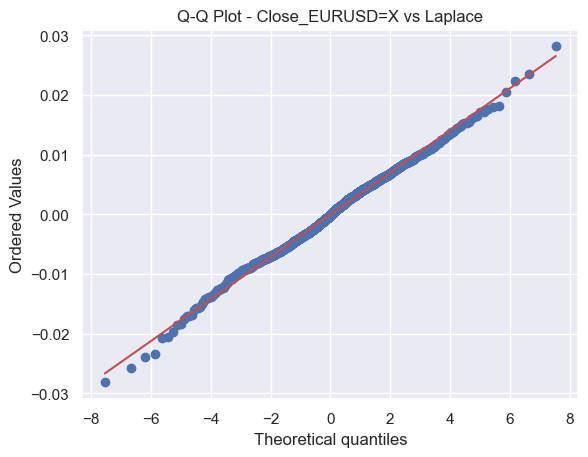

In [94]:
ReturnDistVisual(returns, "EURUSD=X")
qq_plot(returns_filtered,"Close_EURUSD=X", "laplace")

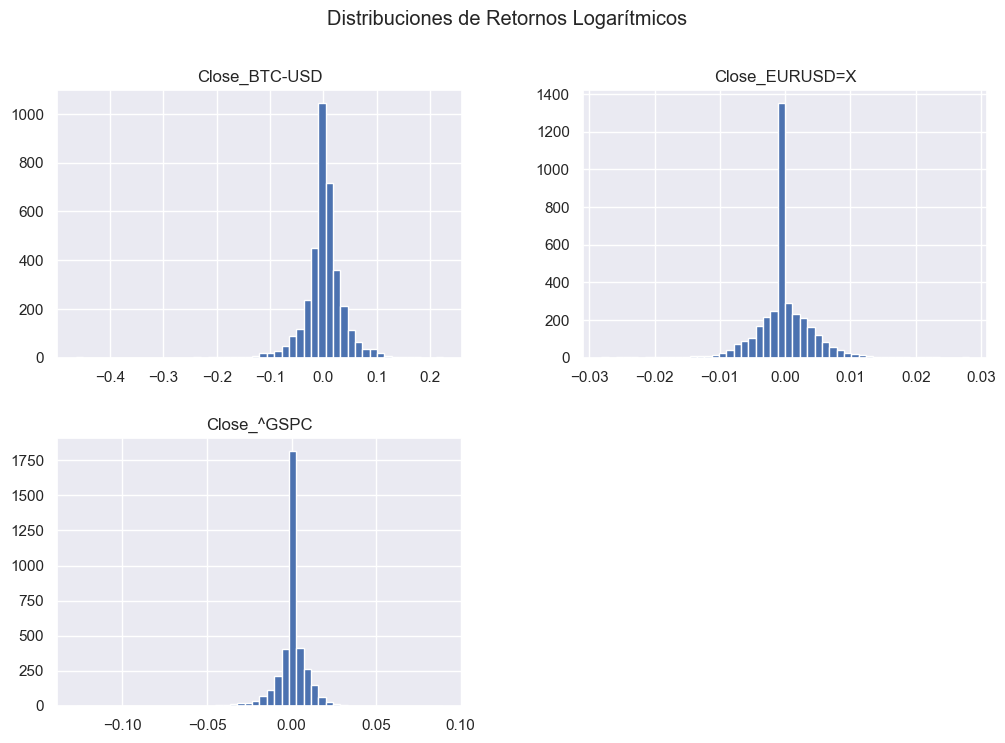

In [98]:
returns.describe()

# Histograma
returns.hist(bins=50, figsize=(12,8), layout=(len(close_cols)//2 + 1, 2))
plt.suptitle("Distribuciones de Retornos Logarítmicos")
plt.show()
